# Importing the libraries

In [2]:
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading the datsets as dataframes

In [3]:
df=pd.read_csv("samsungMobilesData.csv")

# Exploring the datasets

In [50]:
df.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [51]:
df.shape

(407, 11)

# Proceeding with the samsungMobilesData dataset

In [52]:
df.isnull().sum()

name               0
ratings            0
price              0
imgURL             0
camera             0
display            0
battery            0
storage            0
ram                0
processor          0
android_version    0
dtype: int64

In [6]:
df.describe()

,ratings,price,camera,battery,storage,ram,android_version
count,407.00000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4.19828,17363.245700,43.660934,4946.437346,106.199017,5.493857,10.847666
std,0.17762,6735.647203,25.189978,878.467561,58.899992,2.185789,1.829261
min,2.90000,6490.000000,0.000000,1500.000000,1.000000,1.000000,1.000000
25%,4.10000,11982.500000,20.000000,4500.000000,64.000000,4.000000,10.000000
50%,4.20000,15999.000000,48.000000,5000.000000,128.000000,6.000000,11.000000
75%,4.30000,21744.500000,50.000000,5500.000000,128.000000,6.000000,12.000000
max,4.80000,32000.000000,200.000000,7000.000000,512.000000,12.000000,13.000000


In [4]:
import re
def split_phone_data(phone_name):
    match = re.match(r"^(.*) \((.*), .*GB\)$", phone_name)
    
    if match:
        full_model = match.group(1).strip()
        color = match.group(2).strip()
        
        model_match = re.search(r"\b([A-Za-z]+\d+)\b", full_model)
        model = model_match.group(1) if model_match else full_model
        
        has_5g = 1 if '5G' in full_model.upper() else 0
        return model, color, has_5g
    else:
        return None, None, None

In [5]:
df[['model', 'color', '5g']] = df['name'].apply(lambda x: pd.Series(split_phone_data(x)))

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(['imgURL','name','model'],axis = 1 , inplace = True)

In [59]:
df.columns

Index(['ratings', 'price', 'camera', 'display', 'battery', 'storage', 'ram',
       'processor', 'android_version', 'color', '5g'],
      dtype='object')

<Axes: >

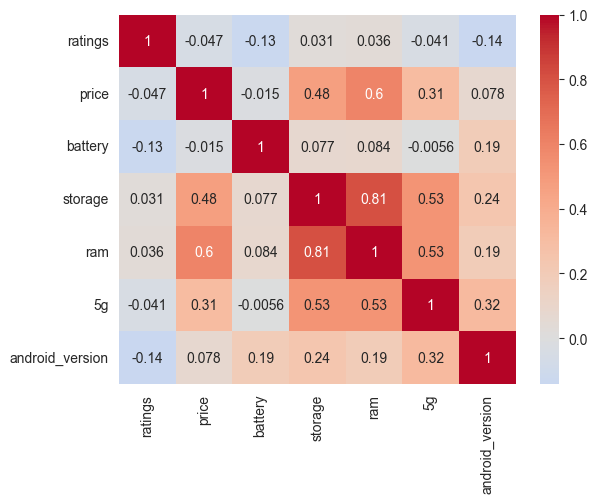

In [62]:
attributes = ['ratings', 'price', 'battery', 'storage', 'ram', '5g', 'android_version']

df_attributes = transformed_dataframe[attributes]
correlation_matrix = df_attributes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Data Processing

In [8]:
df['processor'] = df['processor'].str.replace('Dimensity1080,','Dimensity1080')

In [9]:
df['processor'].value_counts()

processor
not mentioned              274
MediaTek                    16
Dimensity1080               12
Gen8                        11
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: count, dtype: int64

In [10]:
df.head()

,ratings,price,camera,display,battery,storage,ram,processor,android_version,color,5g
0,4.3,9499,50,other_types,6000,64,4,not mentioned,12,Sunrise Copper,0.0
1,4.3,10499,50,other_types,6000,128,4,not mentioned,12,Waterfall Blue,0.0
2,4.3,10499,50,other_types,6000,128,4,not mentioned,12,Nightsky Green,0.0
3,4.3,10499,50,other_types,6000,128,4,not mentioned,12,Sunrise Copper,0.0
4,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12,Aqua Blue,1.0


In [11]:
df.columns

Index(['ratings', 'price', 'camera', 'display', 'battery', 'storage', 'ram',
       'processor', 'android_version', 'color', '5g'],
      dtype='object')

In [12]:
##Encoding of categorical data

transformed_dataframe = pd.get_dummies(df, columns = ['display','processor','color'],drop_first = True)


In [16]:
transformed_dataframe

,ratings,price,camera,battery,storage,ram,android_version,5g,display_HD+ AMOLED,display_LCD,...,color_Sky Blue,color_Sky blue,color_Slate Black,color_Smoky Teal,color_Space Black,color_Stardust Brown,color_Sunrise Copper,color_Violet,color_Waterfall Blue,color_White
0,4.3,9499,50,6000,64,4,12,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,4.3,10499,50,6000,128,4,12,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,4.3,10499,50,6000,128,4,12,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.3,10499,50,6000,128,4,12,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4.3,15499,50,5000,128,6,12,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,4.5,21490,32,3500,128,6,9,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
403,4.3,16199,25,4000,64,4,12,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
404,4.4,9000,13,3300,32,2,8,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
405,4.2,10999,13,4000,32,3,9,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
## Dividing the datset into train and test

X = transformed_dataframe.drop('price',axis = 1 )
y = transformed_dataframe['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,train_size = 0.7 , random_state = 42)


In [18]:
### Scaling the datasets
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()

X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

Reshaping the training and test data into tensors

import numpy as np
y_train = [[item] for item in y_train]
y_train = np.reshape(y_train , (-1,1))
print(y_train.shape)

X_train = tf.reshape(X_train,[-1, 284, 32])
y_train = tf.reshape(y_train , [-1,284,1])

X_train.shape

# Creating the model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU ,PReLU , LeakyReLU , ELU
from tensorflow.keras.layers import Dropout
import optuna

In [31]:
# creating a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics=['mae']
)

# fit the model
model_history = model.fit(X_train, y_train, epochs = 600)

Epoch 1/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13402.3027 - mae: 13402.3027
Epoch 2/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4423.4810 - mae: 4423.4810 
Epoch 3/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4444.8286 - mae: 4444.8286 
Epoch 4/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4539.1357 - mae: 4539.1357 
Epoch 5/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3731.9951 - mae: 3731.9951 
Epoch 6/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2974.1194 - mae: 2974.1194 
Epoch 7/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3207.6560 - mae: 3207.6560 
Epoch 8/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3063.7222 - mae: 3063.7222 
Epoch 9/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2580.0073 - mae: 2580.0073 
Epoch 10/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2534.0706 - mae: 2534.0706 
Epoch 11/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3332.6953 - mae: 3332.6953 
Epoch 12/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3528

# лучшее значение МАЕ 654

In [32]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)               │ (None, 200)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,365 (962.37 KB)

 Trainable params: 82,121 (320.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164,244 (641.58 KB)

In [33]:
# Making the predictions on the test data
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [34]:
y_pred.shape

(122, 1)

In [35]:
y_test.shape
y_test = [[item] for item in y_test]
y_test = np.reshape(y_test , (-1,1))

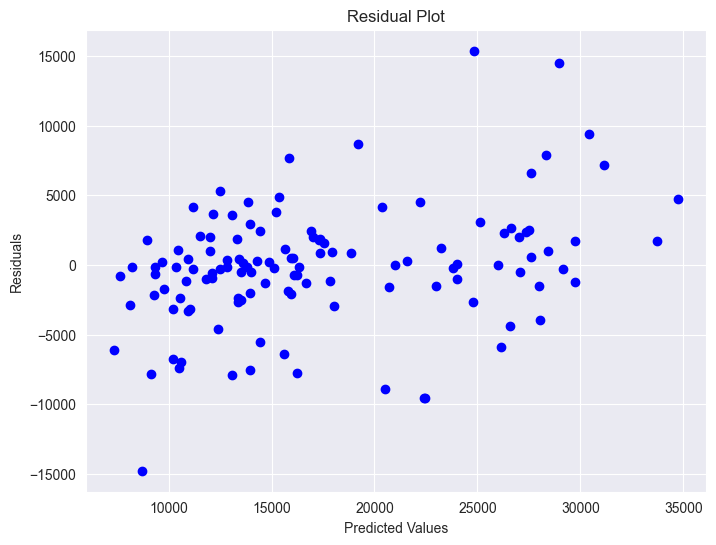

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

res = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred , res ,color = 'blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Creating a denser model

In [42]:
# creating a desnser model using the Sequential API and increasing the number of epochs

model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['mae'])

# fit the model
model_history = model.fit(X_train, y_train, epochs = 1500)

Epoch 1/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 14803.3682 - mae: 14803.3682
Epoch 2/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6566.3276 - mae: 6566.3276 
Epoch 3/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6128.4917 - mae: 6128.4917 
Epoch 4/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3512.3330 - mae: 3512.3330 
Epoch 5/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3076.8831 - mae: 3076.8831
Epoch 6/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2715.8433 - mae: 2715.8433  
Epoch 7/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2611.7878 - mae: 2611.7878 
Epoch 8/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2879.4675 - mae: 2879.4675 
Epoch 9/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2690.6792 - mae: 2690.6792 
Epoch 10/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2409.4304 - mae: 2409.4304 
Epoch 11/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3290.0938 - mae: 3290.0938 
Epoch 12/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

# лучшее значение МАЕ 347

In [43]:
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


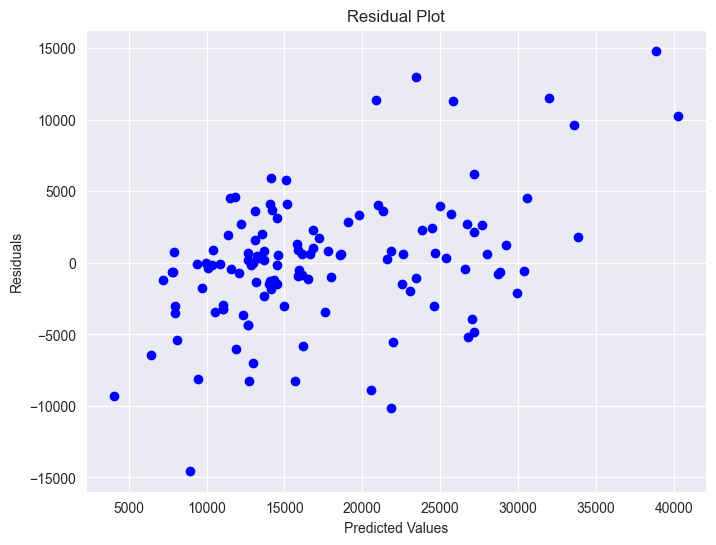

In [44]:
res = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred , res ,color = 'blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [19]:
X = transformed_dataframe.drop('price',axis = 1 )
y = transformed_dataframe['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['mae'])

model_history = model.fit(X_train, y_train, 
                          epochs=1500, 
                          validation_data=(X_val, y_val))

plt.plot(model_history.history['mae'], label='Training MAE')
plt.plot(model_history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


Epoch 1/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 14663.6592 - mae: 14663.6592 - val_loss: 7976.8579 - val_mae: 7976.8579
Epoch 2/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7128.8213 - mae: 7128.8213 - val_loss: 6130.3174 - val_mae: 6130.3174
Epoch 3/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6553.7188 - mae: 6553.7188 - val_loss: 6214.1846 - val_mae: 6214.1846
Epoch 4/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6266.1875 - mae: 6266.1875 - val_loss: 6001.8193 - val_mae: 6001.8193
Epoch 5/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5877.4570 - mae: 5877.4570 - val_loss: 5956.3887 - val_mae: 5956.3887
Epoch 6/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5891.8809 - mae: 5891.8809 - val_loss: 5956.9058 - val_mae: 5956.9058
Epoch 7/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5381.4468 - mae: 5381.4468 - val_loss: 5951.7153 - val_mae: 5951.7153
Epoch 8/1500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5874.7383 - mae: 5874.73

KeyboardInterrupt: 